In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [3]:
df=pd.read_csv("Hitters0.csv")
df.dropna(inplace=True)
df=df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
df=StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca=PCA(n_components=2)
pca_fit=pca.fit_transform(df)

In [9]:
bilesen_df=pd.DataFrame(data=pca_fit,columns=["birinci_bilesen","ikinci_bilesen"])
bilesen_df

,birinci_bilesen,ikinci_bilesen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [11]:
#açıklanan varyans değeri
pca.explained_variance_ratio_
##birinci bileşence veri setinde bulunan değişkenliğin yüzde 45 açıklanmış.
#Genel olarak yüzde 70 olarak veri setini açıklayabiliyorum.

array([0.45245466, 0.24246801])

In [12]:
pca.components_[1]#1 bileşen

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

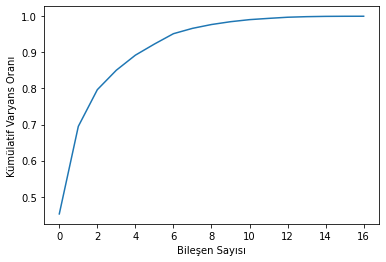

In [16]:
#OPTIMUM BILESEN SAYISI
pca=PCA().fit(df)
#kümülatif toplam:
plt.plot(np.cumsum(pca.explained_variance_ratio_))#-->değişken sayısı kadar bileşen oluşturacak.
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı");

In [17]:
#4 bileşenle %90 açıklanabilirlik.

Final Model

In [18]:
pca=PCA(n_components=3)
pca_fit=pca.fit_transform(df)

In [19]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])